# Russian Elections 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('results2020.txt', sep='\t')

In [3]:
data.columns

Index(['name', 'reg', 'tik', 'uik',
       'Число участников голосования, включенных в список участников голосования на момент окончания голосования',
       'Число бюллетеней, выданных участникам голосования',
       'Число бюллетеней, содержащихся в ящиках для голосования',
       'Число недействительных бюллетеней', 'ДА', 'НЕТ', 'url'],
      dtype='object')

In [4]:
#data.head()

In [5]:
total = data['Число участников голосования, включенных в список участников голосования на момент окончания голосования'].values
voted = data['Число бюллетеней, содержащихся в ящиках для голосования'].values
vote_yes = data['ДА'].values
vote_no  = data['НЕТ'].values
region   = data['reg'] 

In [6]:
#np.unique(data['reg'])

In [7]:
# Optional: filter Moscow only
do_only_moscow = False

if do_only_moscow:
    mos = data['reg']=='город Москва'
    total = total[mos]
    voted = voted[mos]
    vote_yes = vote_yes[mos]
    vote_no = vote_no[mos]
    ind = np.argsort(voted)
else:
    ind = np.argsort(total)
    
total = total[ind]
voted = voted[ind]
vote_yes = vote_yes[ind]
vote_no = vote_no[ind]
region = region[ind]

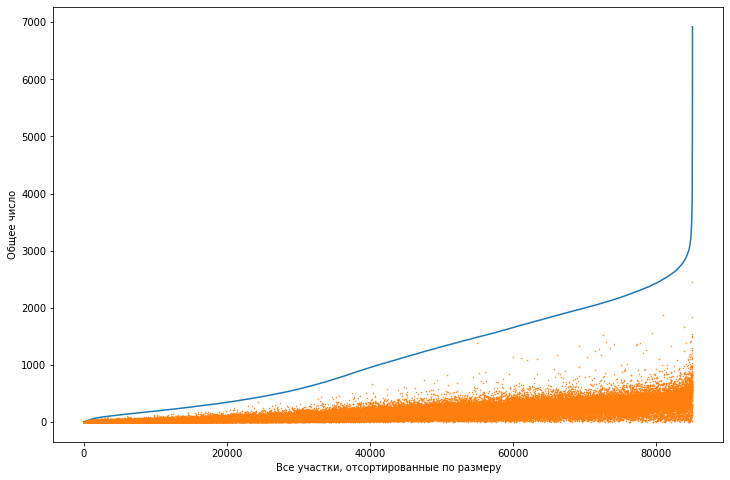

In [8]:
plt.figure(figsize=(12, 8))
if do_only_moscow:
    plt.plot(voted);
else:
    plt.plot(total)
plt.plot(vote_no, '.', markersize=1);
plt.ylabel('Общее число');
plt.xlabel('Все участки, отсортированные по размеру');

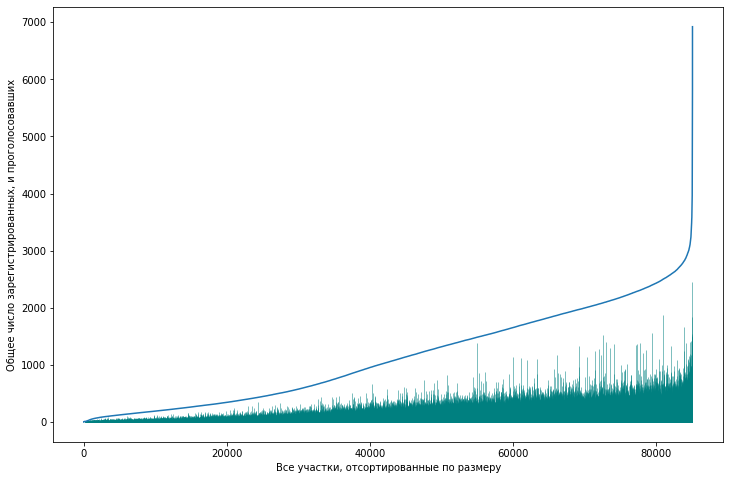

In [9]:
n = len(vote_yes)
plt.figure(figsize=(12, 8))
if do_only_moscow:
    plt.plot(voted);
    plt.vlines(range(n), np.zeros((n,1)), vote_no, linewidth=0.5, color='teal');
    plt.vlines(range(n), vote_no+vote_yes, voted, linewidth=0.5, color='red');
else:
    plt.plot(total)
    plt.vlines(range(n), np.zeros((n,1)), vote_no, linewidth=0.5, color='teal');
plt.ylabel('Общее число зарегистрированных, и проголосовавших');
plt.xlabel('Все участки, отсортированные по размеру');

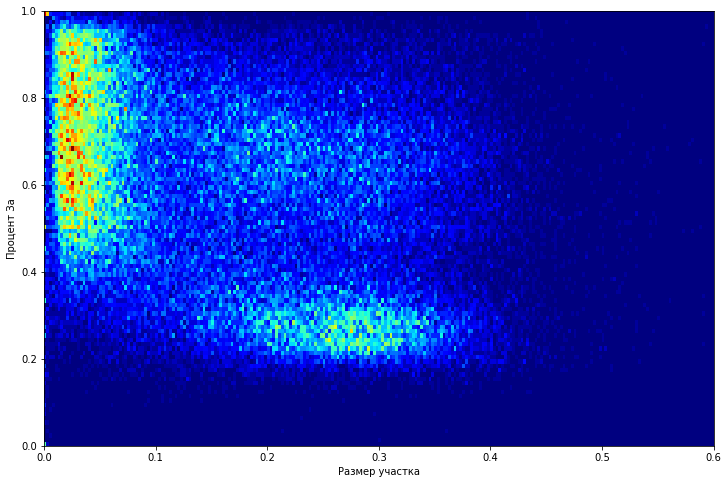

In [10]:
plt.figure(figsize=(12, 8))
x = total/max(total)
y = vote_yes/np.maximum(1, total)
clean = np.logical_not(np.isnan(y))
x = x[clean]
y = y[clean]
plt.hist2d(x, y, bins=(400,100), cmap='jet')
plt.xlim(0, 0.6)
plt.xlabel('Размер участка')
plt.ylabel('Процент За');

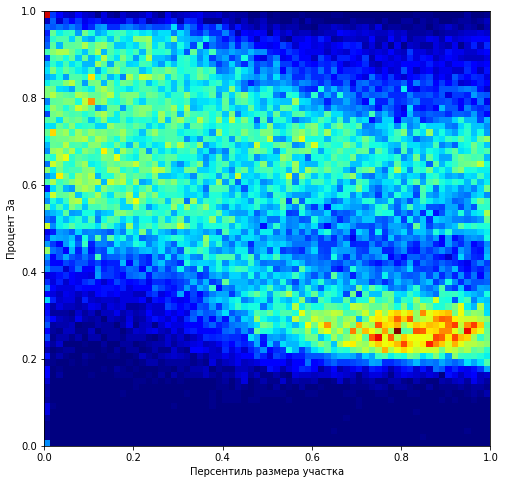

In [11]:
plt.figure(figsize=(8, 8))
x = total/max(total)
y = vote_yes/np.maximum(1, total)
clean = np.logical_not(np.isnan(y))
x = x[clean]
y = y[clean]
x = np.linspace(0,1,len(x))
plt.hist2d(x, y, bins=70, cmap='jet')
plt.xlabel('Персентиль размера участка')
plt.ylabel('Процент За');

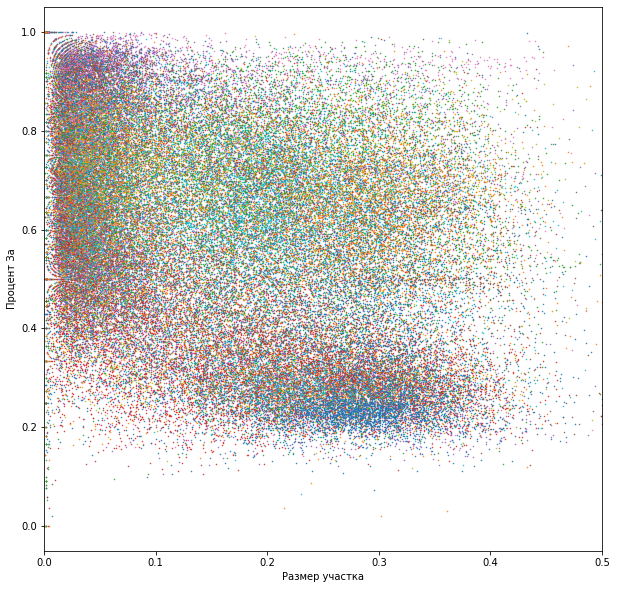

In [12]:
plt.figure(figsize=(10, 10))
x = total/max(total)
y = vote_yes/np.maximum(1, total)
clean = np.logical_not(np.isnan(y))
x = x[clean]
y = y[clean]
r = region[clean]
for i in np.unique(r):
    ind = (r==i)
    plt.plot(x[ind], y[ind], '.', markersize=1, label=r);
plt.xlim(0, 0.5)
plt.xlabel('Размер участка')
plt.ylabel('Процент За');
#plt.legend();

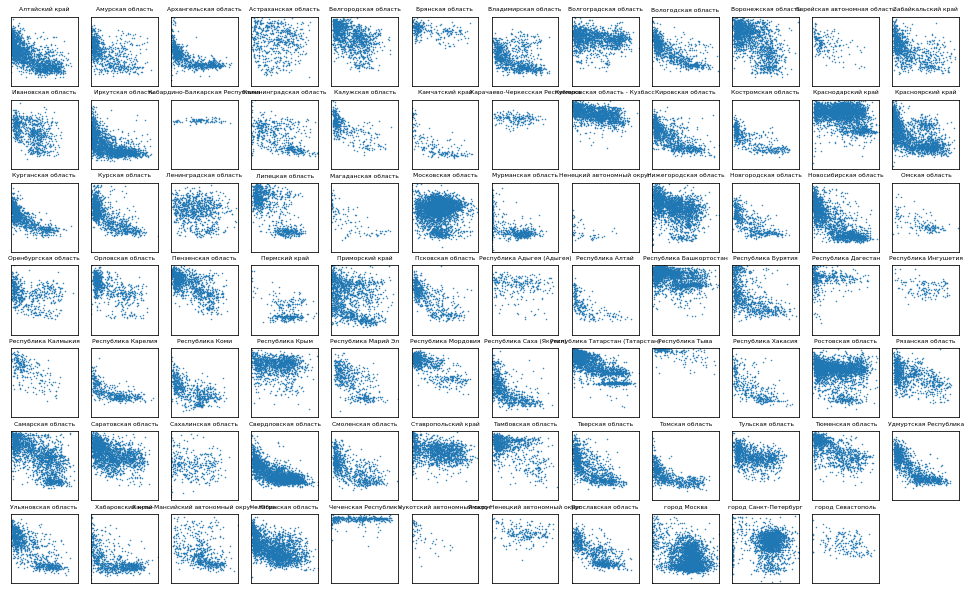

In [13]:
x = total/max(total)
y = vote_yes/np.maximum(1, total)
clean = np.logical_not(np.isnan(y))
x = x[clean]
y = y[clean]
rs = region[clean]
plt.figure(figsize=(17, 15))
i = 0
for r in np.unique(rs):
    i += 1
    plt.subplot(10,12,i)
    ind = (rs==r)
    plt.plot(x[ind], y[ind], '.', markersize=1);
    plt.xlim(0, 0.5)
    plt.ylim(0, 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(r, {'fontsize':6})

#plt.xlabel('Размер участка')
#plt.ylabel('Процент За');

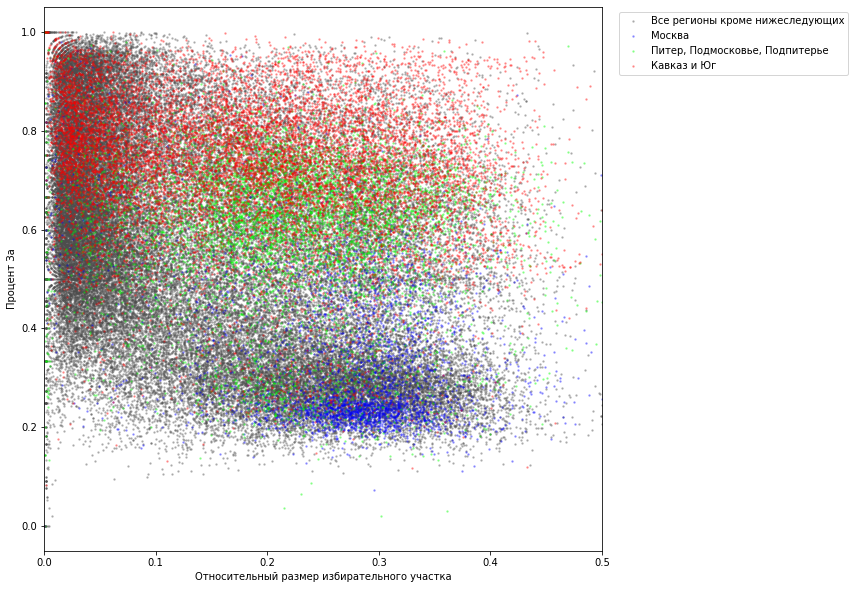

In [15]:
groups = [['город Москва'], 
          ['город Санкт-Петербург','Московская область', 'Ленинградская область'],
          ['Кабардино-Балкарская Республика', 'Чеченская Республика', 'Карачаево-Черкесская Республика', 
           'Республика Дагестан', 'Республика Ингушетия',
           'Краснодарский край', 'Республика Крым', 'Ставропольский край', 'Ростовская область', 
           'Волгоградская область','Белгородская область'],
         ]
group_names = ['Москва',
               'Питер, Подмосковье, Подпитерье', 
               'Кавказ и Юг', ]
colors = [[0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0]]

plt.figure(figsize=(10, 10))
x = total/max(total)
y = vote_yes/np.maximum(1, total)
clean = np.logical_not(np.isnan(y))
x = x[clean]
y = y[clean]
r = region[clean]
ind = (r != '') # A vector of Trues
for i in range(len(groups)):
    ind = np.logical_xor(ind, np.isin(r, groups[i]))
plt.plot(x[ind], y[ind], '.', markersize=3, alpha=0.3, label='Все регионы кроме нижеследующих', color=[0.3, 0.3, 0.3]);
for i in range(len(groups)):
    group = groups[i]
    ind = np.isin(r, group)
    plt.plot(x[ind], y[ind], '.', markersize=3, alpha=0.3, label=group_names[i], color=colors[i]);
plt.xlim(0, 0.5)
plt.xlabel('Относительный размер избирательного участка')
plt.ylabel('Процент За');
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1.0));

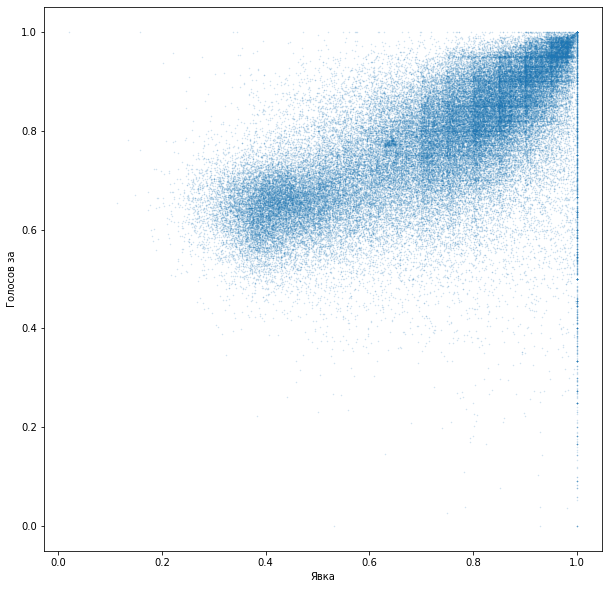

In [19]:
plt.figure(figsize=(10, 10))
clean = np.logical_not(np.logical_or(np.isnan(total), total==0))
plt.plot(voted[clean]/total[clean], vote_yes[clean]/voted[clean], '.', markersize=1, alpha=0.2);
plt.xlabel('Явка');
plt.ylabel('Голосов за');